In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re
from time import time
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
import transformers
from transformers import AutoTokenizer,TFDistilBertModel, DistilBertConfig
from transformers import TFAutoModel

In [11]:
!pip install tensorflow

In [12]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [13]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [14]:
!pip install transformers

In [15]:
#folder_path = os.path.abspath("C:/Users/rkhatkar.XCALIBERINFOTEC/OneDrive - Xcaliber Infotech/Desktop")
released = pd.read_excel(r"C:\Users\PShukla\Downloads\VW_CTDI_OrderHolds_Released_02_13.xlsx")

In [16]:
released.head()

,ctdiOrderHoldsId,holdType,serviceLine,serviceRequest,partNBR,customer,systemEngineer,daysOnHold,holdCode,holdIssue,resolutionCode,resolutionResponse,startTime,endTime,insertDateTime,fileName,createdBy
0,2,PROCUREMENT,ATTATMIS+,IP22067957,XDC1001U,CISCO SYSTEMS,DL-InventoryMgt@list.att.com,8,MFG Part # Missing,XDC1001U - QTY.1 NO PART AVAILABLE,MFG PART # PROVIDED,part provided,2022-08-11T12:52:06-05:00,2022-08-19T12:36:40-05:00,"10/14/2022, 3:19:35 PM",ctdi_order_holds_08192022130343_decrypt.csv,EC2AMAZ-T2KLKUH\Administrator
1,3,PROCUREMENT,ATTATMIS+,R010025352,XDCLHSMD,NaN,DL-InventoryMgt@list.att.com,11,MFG Part # Missing,XDCLHSMD_x000d_\nQTY 1_x000d_\n_x000d_\nPLEASE...,MFG PART # PROVIDED,PART PROVIDED,2022-08-01T10:47:30-05:00,2022-08-12T14:04:53-05:00,"10/14/2022, 3:19:35 PM",ctdi_order_holds_08122022150353_decrypt.csv,EC2AMAZ-T2KLKUH\Administrator
2,4,PROCUREMENT,ATTMISMTCE,R010025332,GLC-TE,CISCO SYSTEMS,DL-InventoryMgt@list.att.com,13,MFG Part # Missing,GLC-TE_x000d_\nQTY 1_x000d_\n_x000d_\nPLEASE P...,MFG PART # PROVIDED,PART PROVIDED,2022-07-28T13:57:47-05:00,2022-08-10T13:38:23-05:00,"10/14/2022, 3:19:35 PM",ctdi_order_holds_08102022140403_decrypt.csv,EC2AMAZ-T2KLKUH\Administrator
3,5,PROCUREMENT,ATTSIGEU,AVTS220715111126,ISE1075,Custom Cable,DL-InventoryMgt@list.att.com,3,MFG Part # Missing,ISE1079_x000d_\nISE1076_x000d_\nISE1075_x000d_...,MFG PART # PROVIDED,"please use from these below from NCRTRANSFER, ...",2022-07-29T13:05:30-05:00,2022-08-01T13:08:29-05:00,"10/14/2022, 3:19:35 PM",ctdi_order_holds_08012022140403_decrypt.csv,EC2AMAZ-T2KLKUH\Administrator
4,6,PROCUREMENT,ATTSIGEU,AVTS220715111126,ISE1076,Custom Cable,DL-InventoryMgt@list.att.com,3,MFG Part # Missing,ISE1079_x000d_\nISE1076_x000d_\nISE1075_x000d_...,MFG PART # PROVIDED,"please use from these below from NCRTRANSFER, ...",2022-07-29T13:05:30-05:00,2022-08-01T13:08:29-05:00,"10/14/2022, 3:19:35 PM",ctdi_order_holds_08012022140403_decrypt.csv,EC2AMAZ-T2KLKUH\Administrator


In [17]:
released.shape

(1214, 17)

In [18]:
released.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ctdiOrderHoldsId    1214 non-null   int64 
 1   holdType            1214 non-null   object
 2   serviceLine         1214 non-null   object
 3   serviceRequest      1214 non-null   object
 4   partNBR             1214 non-null   object
 5   customer            1108 non-null   object
 6   systemEngineer      1214 non-null   object
 7   daysOnHold          1214 non-null   int64 
 8   holdCode            1214 non-null   object
 9   holdIssue           1214 non-null   object
 10  resolutionCode      1136 non-null   object
 11  resolutionResponse  923 non-null    object
 12  startTime           1214 non-null   object
 13  endTime             1214 non-null   object
 14  insertDateTime      1214 non-null   object
 15  fileName            1214 non-null   object
 16  createdBy           1214

In [19]:
duplicated= released[released.duplicated()]
duplicated.shape

(0, 17)

In [20]:
released.columns

Index(['ctdiOrderHoldsId', 'holdType', 'serviceLine', 'serviceRequest',
       'partNBR', 'customer', 'systemEngineer', 'daysOnHold', 'holdCode',
       'holdIssue', 'resolutionCode', 'resolutionResponse', 'startTime',
       'endTime', 'insertDateTime', 'fileName', 'createdBy'],
      dtype='object')

In [21]:
final_df=released[['holdCode','holdIssue','resolutionCode']]

In [22]:
final_df.shape

(1214, 3)

In [97]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1136 entries, 0 to 1213
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   holdCode        1136 non-null   object
 1   holdIssue       1136 non-null   object
 2   resolutionCode  1136 non-null   object
dtypes: object(3)
memory usage: 35.5+ KB


In [23]:
print("Number of missing values:", final_df.isnull().sum().sum())

Number of missing values: 78


In [24]:
print("Number of missing values:", final_df[['holdCode','holdIssue']].isnull().sum().sum())

Number of missing values: 0


In [25]:
print("Number of missing values:", final_df[['resolutionCode']].isnull().sum().sum())

Number of missing values: 78


In [26]:
# remove records which does not having any resolution code
final_df=final_df[final_df['resolutionCode'].isnull()==False]

In [27]:
final_df.shape
#78 records does not having any resolution code 

(1136, 3)

### Data Analysis and Preprocessing

In [28]:
final_df['holdCode'].unique()

array(['MFG Part # Missing', 'ACK Missing', 'PO Missing',
       'Host Name Error', 'EOL No Match', 'CFG Error', 'SDP Error',
       'SDP & CFG Missing', 'CFG Missing', 'IOS Error', 'IOS Missing',
       'SDP Missing', 'SDP & CFG Error', 'OTHER',
       'CTDI WAITING REVISED CI', 'Host Name Missing', 'AT&T Hold',
       'ACK Error', 'MFG Part # Not Delivered', 'MFG Part # Error'],
      dtype=object)

<AxesSubplot:>

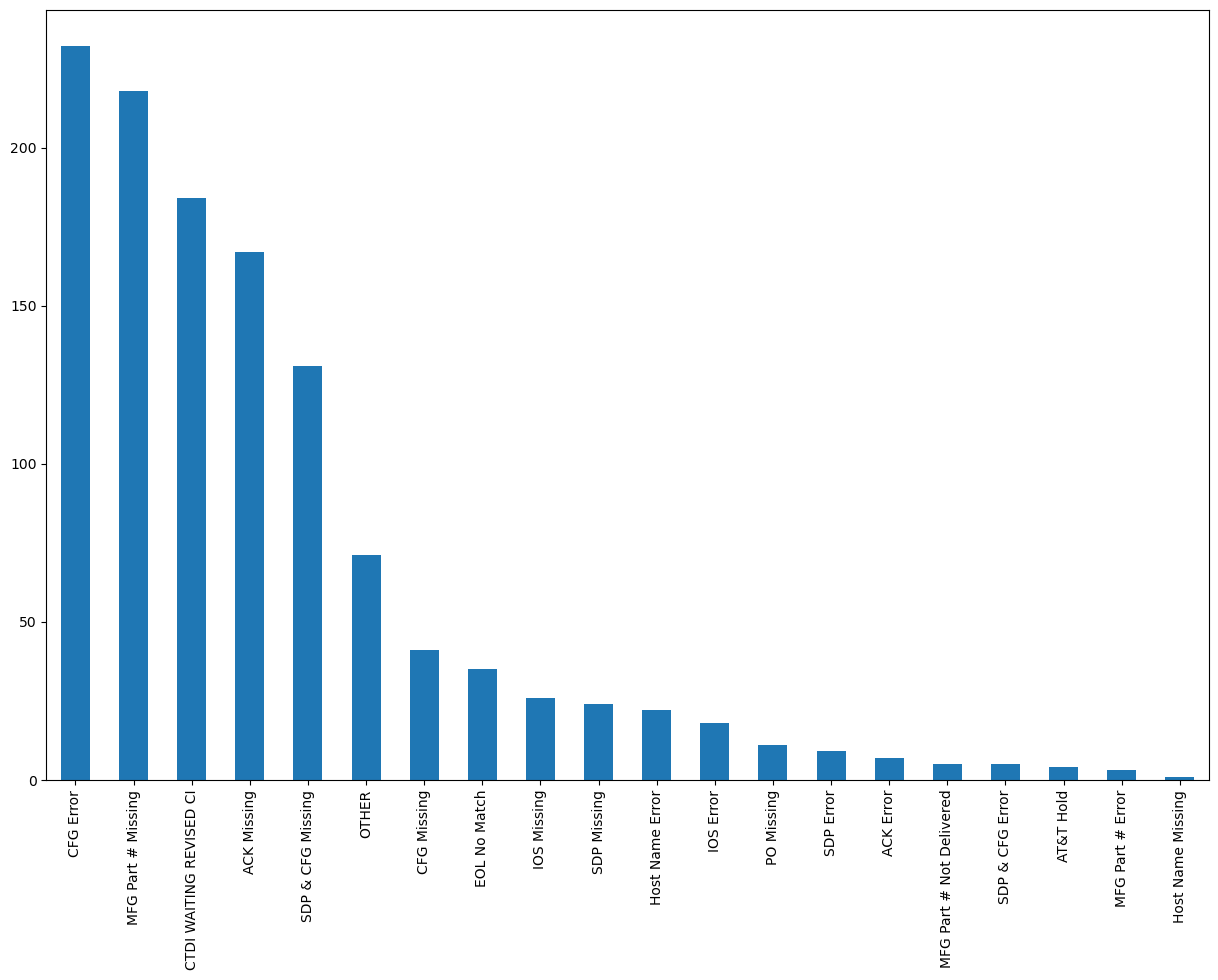

In [29]:
released['holdCode'].value_counts().plot(kind = 'bar' , figsize= (15,10))

In [30]:
data=final_df.groupby(['holdCode'])['holdIssue','resolutionCode'].count().sort_values(by='holdIssue', ascending=False)
data=data.reset_index(level=['holdCode'])
data

C:\Users\PShukla\AppData\Local\Temp\ipykernel_23028\2828481487.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data=final_df.groupby(['holdCode'])['holdIssue','resolutionCode'].count().sort_values(by='holdIssue', ascending=False)


,holdCode,holdIssue,resolutionCode
0,MFG Part # Missing,204,204
1,CFG Error,188,188
2,CTDI WAITING REVISED CI,184,184
3,ACK Missing,165,165
4,SDP & CFG Missing,130,130
5,OTHER,69,69
6,CFG Missing,41,41
7,EOL No Match,34,34
8,IOS Missing,24,24
9,Host Name Error,22,22


In [31]:
distinct_data=final_df.groupby(['holdCode'])['holdIssue','resolutionCode'].nunique().sort_values(by='holdIssue', ascending=False)
distinct_data=distinct_data.reset_index(level=['holdCode'])
distinct_data

C:\Users\PShukla\AppData\Local\Temp\ipykernel_23028\403766125.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  distinct_data=final_df.groupby(['holdCode'])['holdIssue','resolutionCode'].nunique().sort_values(by='holdIssue', ascending=False)


,holdCode,holdIssue,resolutionCode
0,CFG Error,132,7
1,MFG Part # Missing,108,9
2,EOL No Match,25,5
3,CTDI WAITING REVISED CI,23,2
4,SDP & CFG Missing,20,7
5,IOS Missing,15,7
6,OTHER,15,4
7,CFG Missing,14,2
8,ACK Missing,12,3
9,Host Name Error,11,8


<AxesSubplot:>

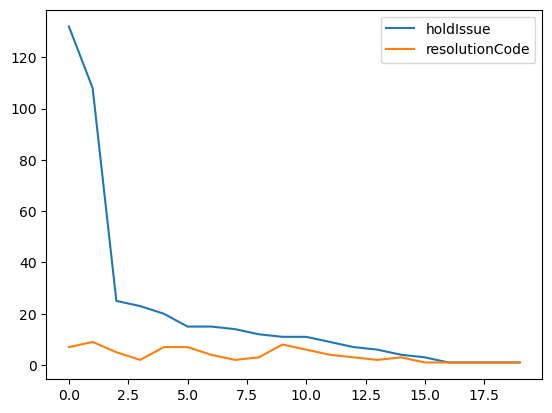

In [32]:
distinct_data.plot()

In [33]:
import seaborn as sns

<AxesSubplot:xlabel='holdIssue', ylabel='holdCode'>

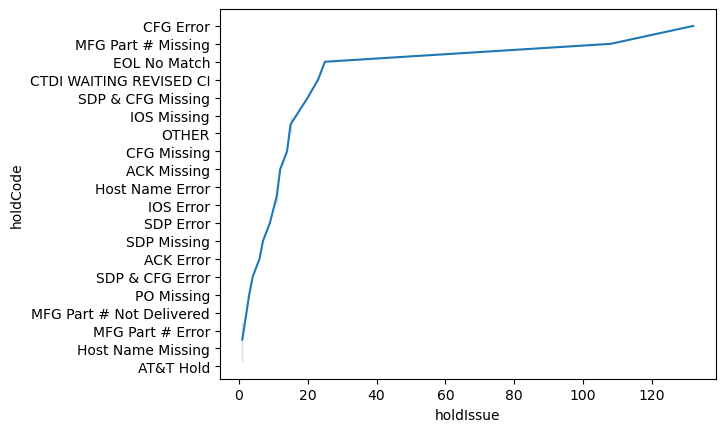

In [34]:
sns.lineplot(x='holdIssue', y='holdCode',data=distinct_data)

In [35]:
final_df2=final_df.reset_index (drop=True)

In [36]:
final_df2["holdCode_holdIssue"]=final_df2["holdCode"]+final_df2["holdIssue"]

In [37]:
final_df2

,holdCode,holdIssue,resolutionCode,holdCode_holdIssue
0,MFG Part # Missing,XDC1001U - QTY.1 NO PART AVAILABLE,MFG PART # PROVIDED,MFG Part # MissingXDC1001U - QTY.1 NO PART AVA...
1,MFG Part # Missing,XDCLHSMD_x000d_\nQTY 1_x000d_\n_x000d_\nPLEASE...,MFG PART # PROVIDED,MFG Part # MissingXDCLHSMD_x000d_\nQTY 1_x000d...
2,MFG Part # Missing,GLC-TE_x000d_\nQTY 1_x000d_\n_x000d_\nPLEASE P...,MFG PART # PROVIDED,MFG Part # MissingGLC-TE_x000d_\nQTY 1_x000d_\...
3,MFG Part # Missing,ISE1079_x000d_\nISE1076_x000d_\nISE1075_x000d_...,MFG PART # PROVIDED,MFG Part # MissingISE1079_x000d_\nISE1076_x000...
4,MFG Part # Missing,ISE1079_x000d_\nISE1076_x000d_\nISE1075_x000d_...,MFG PART # PROVIDED,MFG Part # MissingISE1079_x000d_\nISE1076_x000...
...,...,...,...,...
1131,CTDI WAITING REVISED CI,SHIPPING HOLD,MORE INFORMATION NEEDED,CTDI WAITING REVISED CISHIPPING HOLD
1132,CTDI WAITING REVISED CI,SHIPPING HOLD,MORE INFORMATION NEEDED,CTDI WAITING REVISED CISHIPPING HOLD
1133,CTDI WAITING REVISED CI,CTDI WAITING FOR REVISED CI,RCD REVISED CI,CTDI WAITING REVISED CICTDI WAITING FOR REVISE...
1134,CFG Error,THE FOLLOWING ISSUE WAS FOUND DURING STAGING: ...,UPDATED CFG FILE,CFG ErrorTHE FOLLOWING ISSUE WAS FOUND DURING ...


In [38]:
final_df2

,holdCode,holdIssue,resolutionCode,holdCode_holdIssue
0,MFG Part # Missing,XDC1001U - QTY.1 NO PART AVAILABLE,MFG PART # PROVIDED,MFG Part # MissingXDC1001U - QTY.1 NO PART AVA...
1,MFG Part # Missing,XDCLHSMD_x000d_\nQTY 1_x000d_\n_x000d_\nPLEASE...,MFG PART # PROVIDED,MFG Part # MissingXDCLHSMD_x000d_\nQTY 1_x000d...
2,MFG Part # Missing,GLC-TE_x000d_\nQTY 1_x000d_\n_x000d_\nPLEASE P...,MFG PART # PROVIDED,MFG Part # MissingGLC-TE_x000d_\nQTY 1_x000d_\...
3,MFG Part # Missing,ISE1079_x000d_\nISE1076_x000d_\nISE1075_x000d_...,MFG PART # PROVIDED,MFG Part # MissingISE1079_x000d_\nISE1076_x000...
4,MFG Part # Missing,ISE1079_x000d_\nISE1076_x000d_\nISE1075_x000d_...,MFG PART # PROVIDED,MFG Part # MissingISE1079_x000d_\nISE1076_x000...
...,...,...,...,...
1131,CTDI WAITING REVISED CI,SHIPPING HOLD,MORE INFORMATION NEEDED,CTDI WAITING REVISED CISHIPPING HOLD
1132,CTDI WAITING REVISED CI,SHIPPING HOLD,MORE INFORMATION NEEDED,CTDI WAITING REVISED CISHIPPING HOLD
1133,CTDI WAITING REVISED CI,CTDI WAITING FOR REVISED CI,RCD REVISED CI,CTDI WAITING REVISED CICTDI WAITING FOR REVISE...
1134,CFG Error,THE FOLLOWING ISSUE WAS FOUND DURING STAGING: ...,UPDATED CFG FILE,CFG ErrorTHE FOLLOWING ISSUE WAS FOUND DURING ...


In [39]:
# Text data clean
final_df2.isnull().sum()

holdCode              0
holdIssue             0
resolutionCode        0
holdCode_holdIssue    0
dtype: int64

In [79]:
final_df2['resolutionCode'].value_counts()

MFG PART # PROVIDED        211
UPDATED CFG FILE           174
RCD REVISED CI             174
ACK PROVIDED               127
SDP & CFG FILE PROVIDED    116
OTHER                       85
CFG FILE PROVIDED           53
UPDATED EOL PROVIDED        40
UPDATED SDP&CFG FILE        23
UPDATED SDP FILE            22
SDP FILE PROVIDED           21
IOS PROVIDED                19
HOST NAME ERROR CLEARED     11
PO PROVIDED                 10
ORDER CANCELLED             10
MORE INFORMATION NEEDED     10
ACK UPDATED                  9
UPDATED IOS                  8
HOST NAME PROVIDED           5
MFG PRT# UPDATED             4
MFG PART #  DELIVERED        3
HOLD IGNORE                  1
Name: resolutionCode, dtype: int64

In [40]:
def cleanText(words):
    words = re.sub("[^a-zA-Z]"," ",words)
    text = words.lower().split()
    return " ".join(text)

final_df2['holdCode_holdIssue'] = final_df2['holdCode_holdIssue'].apply(cleanText)

In [41]:
!pip install nltk
import nltk

In [42]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [43]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PShukla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
#stop = set(stopwords.words('english'))
stop = stopwords.words('english')
lem = WordNetLemmatizer()


def remove_stopwords(text):
    """The function to removing stopwords"""
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

def word_lem(text):
    """The function to apply lemmatizing"""
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

In [45]:
final_df2['holdCode_holdIssue'] = final_df2['holdCode_holdIssue'].apply(remove_stopwords)
final_df2['holdCode_holdIssue'] = final_df2['holdCode_holdIssue'].apply(word_lem)

### By Logistic regression

In [46]:
train, test = train_test_split(final_df2, test_size=0.2, random_state=42)

In [47]:
train_tag = train.apply(lambda x: TaggedDocument(words=word_tokenize(x['holdCode_holdIssue']), tags=[x.resolutionCode]), axis=1)

test_tag = test.apply(lambda x: TaggedDocument(words=word_tokenize(x['holdCode_holdIssue']), tags=[x.resolutionCode]), axis=1)

In [48]:
doc_model = Doc2Vec(dm=0, vector_size=100, min_count=2, window=2, sample = 0)
               
doc_model.build_vocab(train_tag)

In [49]:
doc_model.corpus_total_words

13567

In [50]:
%time doc_model.train(train_tag, total_examples=doc_model.corpus_count, epochs=30) 

Wall time: 1.17 s


In [51]:
def vector_for_learning(model, input_docs):
    sents = input_docs
    targets, feature_vectors = zip(*[(doc.tags[0], model.infer_vector(doc.words)) for doc in sents])
    return targets, feature_vectors

In [52]:
y_train, X_train = vector_for_learning(doc_model, train_tag)
y_test, X_test = vector_for_learning(doc_model, test_tag)

In [53]:
log_reg = LogisticRegression(n_jobs=1, C=5)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
print('Testing accuracy %s' % accuracy_score(y_pred, y_test))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.8333333333333334
Testing F1 score: 0.8129297724251725


In [55]:
ytest = np.array(y_test)
print(classification_report(ytest, y_pred))

                         precision    recall  f1-score   support

           ACK PROVIDED       0.82      1.00      0.90        18
            ACK UPDATED       0.00      0.00      0.00         2
      CFG FILE PROVIDED       0.44      0.44      0.44         9
HOST NAME ERROR CLEARED       0.50      0.67      0.57         3
     HOST NAME PROVIDED       0.00      0.00      0.00         2
           IOS PROVIDED       1.00      0.33      0.50         3
    MFG PART # PROVIDED       0.95      0.90      0.93        42
       MFG PRT# UPDATED       0.00      0.00      0.00         1
MORE INFORMATION NEEDED       1.00      1.00      1.00         1
        ORDER CANCELLED       1.00      0.50      0.67         2
                  OTHER       0.86      0.86      0.86        14
            PO PROVIDED       1.00      1.00      1.00         2
         RCD REVISED CI       1.00      1.00      1.00        37
SDP & CFG FILE PROVIDED       0.81      1.00      0.90        30
      SDP FILE PROVIDED 

C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Linear Support Vector Machine




In [56]:

svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

In [57]:
preds = svm.predict(X_test)
print('Testing accuracy %s' % accuracy_score(preds, y_test))
print('Testing F1 score: {}'.format(f1_score(y_test, preds, average='weighted')))

Testing accuracy 0.8245614035087719
Testing F1 score: 0.8046454766990399


In [58]:
print(classification_report(ytest, preds))

                         precision    recall  f1-score   support

           ACK PROVIDED       0.72      1.00      0.84        18
            ACK UPDATED       0.00      0.00      0.00         2
      CFG FILE PROVIDED       0.44      0.44      0.44         9
HOST NAME ERROR CLEARED       0.40      0.67      0.50         3
     HOST NAME PROVIDED       0.00      0.00      0.00         2
           IOS PROVIDED       1.00      0.33      0.50         3
    MFG PART # PROVIDED       0.92      0.86      0.89        42
       MFG PRT# UPDATED       0.00      0.00      0.00         1
MORE INFORMATION NEEDED       1.00      1.00      1.00         1
        ORDER CANCELLED       1.00      0.50      0.67         2
                  OTHER       0.92      0.79      0.85        14
            PO PROVIDED       1.00      1.00      1.00         2
         RCD REVISED CI       1.00      1.00      1.00        37
SDP & CFG FILE PROVIDED       0.81      1.00      0.90        30
      SDP FILE PROVIDED 

C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 

In [59]:
dm_model = Doc2Vec(dm=1, vector_size=100, min_count=2, window=2, sample = 0, negative=5, alpha=0.025, min_alpha=0.001)
dm_model.build_vocab(train_tag)

In [60]:
dm_model.corpus_total_words

13567

In [61]:
%time dm_model.train(train_tag, total_examples=dm_model.corpus_count, epochs=30) 

Wall time: 1.94 s


In [62]:
y_train_dm, X_train_dm = vector_for_learning(dm_model, train_tag)
y_test_dm, X_test_dm = vector_for_learning(dm_model, test_tag)

In [63]:
log_reg = LogisticRegression(n_jobs=1, C=5)
log_reg.fit(X_train_dm, y_train_dm)
pred = log_reg.predict(X_test_dm)

print('Testing accuracy %s' % accuracy_score(y_test_dm, pred))
print('Testing F1 score: {}'.format(f1_score(y_test_dm, pred, average='weighted')))

Testing accuracy 0.7763157894736842
Testing F1 score: 0.7396786483388385


C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
ytest = np.array(y_test_dm)
print(classification_report(ytest, pred))

                         precision    recall  f1-score   support

           ACK PROVIDED       0.69      1.00      0.82        18
            ACK UPDATED       0.00      0.00      0.00         2
      CFG FILE PROVIDED       0.50      0.33      0.40         9
HOST NAME ERROR CLEARED       0.50      0.33      0.40         3
     HOST NAME PROVIDED       0.00      0.00      0.00         2
           IOS PROVIDED       0.00      0.00      0.00         3
    MFG PART # PROVIDED       0.84      0.86      0.85        42
       MFG PRT# UPDATED       0.00      0.00      0.00         1
MORE INFORMATION NEEDED       0.00      0.00      0.00         1
        ORDER CANCELLED       0.67      1.00      0.80         2
                  OTHER       0.60      0.64      0.62        14
            PO PROVIDED       1.00      1.00      1.00         2
         RCD REVISED CI       0.92      0.95      0.93        37
SDP & CFG FILE PROVIDED       0.76      0.97      0.85        30
      SDP FILE PROVIDED 

C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
svm = LinearSVC()
svm.fit(X_train_dm, y_train_dm)
pred_y = svm.predict(X_test_dm)

In [66]:
print('Testing accuracy %s' % accuracy_score(pred_y, y_test_dm))
print('Testing F1 score: {}'.format(f1_score(y_test_dm, pred_y, average='weighted')))

Testing accuracy 0.7850877192982456
Testing F1 score: 0.749363324915875


In [67]:
print(classification_report(ytest, pred_y))

                         precision    recall  f1-score   support

           ACK PROVIDED       0.64      1.00      0.78        18
            ACK UPDATED       0.00      0.00      0.00         2
      CFG FILE PROVIDED       0.67      0.44      0.53         9
HOST NAME ERROR CLEARED       0.00      0.00      0.00         3
     HOST NAME PROVIDED       0.00      0.00      0.00         2
           IOS PROVIDED       0.00      0.00      0.00         3
    MFG PART # PROVIDED       0.90      0.86      0.88        42
       MFG PRT# UPDATED       0.00      0.00      0.00         1
MORE INFORMATION NEEDED       1.00      1.00      1.00         1
        ORDER CANCELLED       1.00      1.00      1.00         2
                  OTHER       0.75      0.64      0.69        14
            PO PROVIDED       1.00      1.00      1.00         2
         RCD REVISED CI       0.97      0.95      0.96        37
SDP & CFG FILE PROVIDED       0.73      1.00      0.85        30
      SDP FILE PROVIDED 

C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PShukla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## CATBOOST:-

In [68]:
!pip install catboost

In [98]:
import catboost

In [103]:
from catboost import CatBoostClassifier, Pool
import pandas as pd

#data = pd.DataFrame({'string_column': ['val0', 'val1', 'val2'],
                     #'int_column': [1,2,3],
                     #'float_column': [1.2,2,4.1]})
#print(data)
#print(data.dtypes)




In [104]:
type(X_train)

tuple

In [106]:
X_train

(array([-1.63264200e-01, -2.06233755e-01, -3.33081186e-01,  6.11475766e-01,
         5.53617597e-01,  1.12347230e-01, -3.06906402e-01, -3.05421710e-01,
        -6.05318487e-01,  2.21108831e-03, -1.34107292e-01,  3.90661865e-01,
         3.68407331e-02, -2.43282616e-01, -2.24205837e-01, -2.14392856e-01,
         1.05253614e-01,  7.19830871e-01, -2.39026368e-01, -8.94163325e-02,
        -1.68552265e-01, -2.19091773e-01, -4.03806120e-01,  1.02335572e-01,
         1.46036640e-01, -5.04622996e-01, -4.70948249e-01, -6.33817255e-01,
         7.29803145e-02, -3.71559590e-01,  3.02246243e-01, -1.02913335e-01,
        -3.01462188e-02, -1.77630097e-01,  2.50577956e-01,  1.85171530e-01,
        -1.72505897e-04, -3.66755128e-01, -1.58880576e-01,  1.46058157e-01,
        -1.45234689e-01, -6.38195515e-01,  2.94747442e-01, -4.43506271e-01,
         3.48576516e-01, -3.16107720e-01,  7.31133595e-02, -3.67138654e-01,
         1.94281176e-01, -3.06461245e-01,  8.05904120e-02,  3.42704087e-01,
        -1.2

In [105]:
type(y_train)

tuple

In [109]:
import numpy as np
X_train1 = np.array(X_train)
y_train1 = np.array(y_train) 

In [110]:
train_data = Pool(
    X_train1,y_train1
)


In [118]:
model = CatBoostClassifier(
    iterations=1000,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)
model.fit(X=train_data)

0:	learn: 1.2611198	total: 317ms	remaining: 5m 16s
1:	learn: 0.9752785	total: 572ms	remaining: 4m 45s
2:	learn: 0.8377952	total: 843ms	remaining: 4m 40s
3:	learn: 0.7429366	total: 1.12s	remaining: 4m 38s
4:	learn: 0.6761172	total: 1.4s	remaining: 4m 38s
5:	learn: 0.6182658	total: 1.67s	remaining: 4m 35s
6:	learn: 0.5712745	total: 1.94s	remaining: 4m 34s
7:	learn: 0.5373233	total: 2.21s	remaining: 4m 34s
8:	learn: 0.5044539	total: 2.48s	remaining: 4m 33s
9:	learn: 0.4708991	total: 2.77s	remaining: 4m 33s
10:	learn: 0.4511098	total: 3.04s	remaining: 4m 33s
11:	learn: 0.4322708	total: 3.32s	remaining: 4m 33s
12:	learn: 0.4135611	total: 3.6s	remaining: 4m 33s
13:	learn: 0.3983800	total: 3.86s	remaining: 4m 32s
14:	learn: 0.3883333	total: 4.15s	remaining: 4m 32s
15:	learn: 0.3729167	total: 4.43s	remaining: 4m 32s
16:	learn: 0.3528185	total: 4.7s	remaining: 4m 31s
17:	learn: 0.3455498	total: 4.97s	remaining: 4m 31s
18:	learn: 0.3366908	total: 5.25s	remaining: 4m 30s
19:	learn: 0.3293648	tota

In [119]:
X_test1 = np.array(X_test)

In [120]:
y_pred = model.predict(X_test1)

In [121]:
print('Testing accuracy %s' % accuracy_score(y_pred, y_test))


Testing accuracy 0.8333333333333334


In [ ]:
##XGBOOST:--

In [123]:
import xgboost

In [125]:
from xgboost import XGBClassifier, Pool
import pandas as pd

ImportError: cannot import name 'Pool' from 'xgboost' (C:\Users\PShukla\Anaconda3\lib\site-packages\xgboost\__init__.py)

In [88]:
import numpy as np
X_train1 = np.array(X_train)
y_train1 = np.array(y_train) 

In [107]:
type(X_train1)

numpy.ndarray

### By Using BERT Model

In [ ]:
X = final_df2['holdCode_holdIssue']
y = final_df2['resolutionCode']
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [ ]:
y

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
# final_df2['resolutionCode'] = labelencoder.fit_transform(final_df2['resolutionCode']).astype(str)

In [ ]:
# encoder = LabelEncoder()
# encoder.fit(y_train)
# # encoder.fit(y_test)

# y_train = encoder.transform(y_train)
# y_test = encoder.transform(y_test)

num_classes = np.max(y_train) + 1
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
     

In [ ]:

# Creating tokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

In [ ]:
bert = TFAutoModel.from_pretrained('distilbert-base-uncased')

In [ ]:
for layer in bert.layers:
      layer.trainable = True
     

In [ ]:
# Tokenization of the data
def text_encode(text, tokenizer, max_len=100):
    tokens = text.apply(lambda x: tokenizer(x,return_tensors='tf',truncation=True,padding='max_length',
                                            max_length=max_len, 
                                            add_special_tokens=True))
    input_ids= []
    attention_mask=[]
    for item in tokens:
        input_ids.append(item['input_ids'])
        attention_mask.append(item['attention_mask'])
    input_ids, attention_mask=np.squeeze(input_ids), np.squeeze(attention_mask)

    return [input_ids,attention_mask]
     

In [ ]:
X_train_input_ids, X_train_attention_mask = text_encode(X_train, tokenizer, max_len=100)
X_test_input_ids, X_test_attention_mask = text_encode(X_test, tokenizer, max_len=100)


In [ ]:
# model creation
def build_model(bert_model, maxlen=100):
   input_ids = tf.keras.Input(shape=(maxlen,),dtype=tf.int32, name='input_ids')
   attention_mask = tf.keras.Input(shape=(maxlen,),dtype=tf.int32, name='attention_mask')

   sequence_output = bert_model(input_ids,attention_mask=attention_mask)
   output = sequence_output[0][:,0,:]
   output = tf.keras.layers.Dense(32,activation='relu')(output)
   output = tf.keras.layers.Dropout(0.2)(output)
   output = tf.keras.layers.Dense(5,activation='softmax')(output)

   model = tf.keras.models.Model(inputs = [input_ids,attention_mask], outputs = [output])
   model.compile(Adam(lr=1e-5), loss='SoftmaxCrossEntropy', metrics=['accuracy'])

   return model

In [ ]:

model = build_model(bert, maxlen=100)

In [ ]:
X_train_input_ids.shape,X_train_attention_mask.shape,y_train.shape,y_test.shape

In [ ]:
history = model.fit( [X_train_input_ids, X_train_attention_mask],
    y_train,
    batch_size=32,
    validation_data=([X_test_input_ids, X_test_attention_mask], y_test),
    epochs=10 )

In [ ]:
X = final_df2['holdCode_holdIssue']
y = final_df2['resolutionCode']
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
X_train.shape, y_train.shape
